# Decisison Tree Implementation


## Questions from PDF file.

1. **Is the Decision Tree model used for supervised or unsupervised classification? Explain your answer.** 

Any method which uses a training set with "correct answers" to train are, can be called as supervised learning methods, and then when we put the model into testing, its results are based on knowledge it gained during the training.
To develop a model with a Decision Tree, sufficient training examples with "correct answers" are used to train the model, like in supervised learning it is mandatory to have a training set with correct answers to train the model to get desired results.
so the Decision Tree is supervised learning

#### ***Preliminary Questions***

1. **What is the nature of the attributes of the dataset?**

We can see from the dataset and also from column names that the attributes are all of numeric (quantitative) nature, they all represent a distance

2. **Do you think it is necessary to transform the attributes (scaling, standardization, ...)?**

Not necessarily, because all values over all columns (attributes) are distinct.

3. **How are you going to use real value attributes to build your Decision Tree?**

I am going to use these real value attributes as suggested in PDF file, define three partitions each having the same number of instances.


### Importing the modules that will do all the work

In [ ]:
!pip install PyDrive
!pip install scipy

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

### Import the data

Firstly, I am taking the Iris dataset from already built dataframe with the help of seaborn library

In [90]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now that I loaded the data into a **dataframe** called *df*, we also had the first look (first five rows) at the dataframe with `head()`


### Finding Entropies and DPs

Next, **the main idea** is that I need to calculate **entropies** and **discriminiative powers** and compare them afterwards to build the tree, to achieve that, I will be taking a column or attribute (these could be also as lists) and divide them into 3 groups being *short*, *intermediate* and *long*. I am then going to calculate all the entropies for these 3 groups of attribute and calculate also the general entropy, then DPs and so on. To achieve this, I will be defining a of function to easily handle all the steps.

So the `entropy_by_attr()` function will simply sort the dataframe with respect to the given column name in descending order. After sorting, it will divide the data into 3 groups being short, intermediate and long.After calculating the entropies, it will calculate and return the discriminative power so that we can calculate all the DPs with one another.

In [91]:
## I am defining this logb2() function because there will be some cases
## where a certain group will have 0 species and math.log2() will through
## exceptions. This is my way of handling the error. It will return 0 if 
## the number n is 0, which suits perfectly with our purpose
def logb2(n):
  if (n!=0):
    return math.log2(n)
  else:
    return 0

## will print all grouped entropies, a total entropy and also the discriminative power for the given dataframe and particular attribute 
def entropy_by_attr(df, attr_name):
  nb_total = 150
  nb_setosa = 50
  nb_versicolor = 50
  nb_virginica = 50

  df_sorted = df.sort_values(by=attr_name, ascending=False)
  
  group1, group2, group3 = df_sorted[:50], df_sorted[50:100], df_sorted[100:150]

  g1_setosa = group1.query('species == "setosa"').species.count()
  g1_versicolor = group1.query('species == "versicolor"').species.count()
  g1_virginica = group1.query('species == "virginica"').species.count()
  g1_total = g1_setosa + g1_versicolor + g1_virginica

  g2_setosa = group2.query('species == "setosa"').species.count()
  g2_versicolor = group2.query('species == "versicolor"').species.count()
  g2_virginica = group2.query('species == "virginica"').species.count()
  g2_total = g2_setosa + g2_versicolor + g2_virginica

  g3_setosa = group3.query('species == "setosa"').species.count()
  g3_versicolor = group3.query('species == "versicolor"').species.count()
  g3_virginica = group3.query('species == "virginica"').species.count()
  g3_total = g3_setosa + g3_versicolor + g3_virginica

  g1_entropy = -(g1_setosa/g1_total)*logb2(g1_setosa/g1_total) - (g1_versicolor/g1_total)*logb2(g1_versicolor/g1_total) - (g1_virginica/g1_total)*logb2(g1_virginica/g1_total)
  
  g2_entropy = -(g2_setosa/g2_total)*logb2(g2_setosa/g2_total) - (g2_versicolor/g2_total)*logb2(g2_versicolor/g2_total) - (g2_virginica/g2_total)*logb2(g2_virginica/g2_total)

  g3_entropy = -(g3_setosa/g3_total)*logb2(g3_setosa/g3_total) - (g3_versicolor/g3_total)*logb2(g3_versicolor/g3_total) - (g3_virginica/g3_total)*logb2(g3_virginica/g3_total)

  total_entropy = - (nb_setosa/nb_total)*logb2(nb_setosa/nb_total) - (nb_versicolor/nb_total)*logb2(nb_versicolor/nb_total) - (nb_virginica/nb_total)*logb2(nb_virginica/nb_total)

  disc_power = total_entropy - ((g1_total/nb_total)*g1_entropy + (g2_total/nb_total)*g2_entropy + (g3_total/nb_total)*g3_entropy)

  print('Entropy of 1st group: ', g1_entropy)
  print('Entropy of 2nd group: ', g2_entropy)
  print('Entropy of 3rd group: ', g3_entropy)
  print('The total entropy for the attribute', attr_name, ' is ',total_entropy)
  print('Finally, \nDiscriminative Power for ', attr_name, 'is \n', disc_power, '\n\n')



So to achieve our purpose we need to call our function `entropy_by_attr()` to compare different entropy values and also compare the discriminative powers **with respect to all 4 columns(attributes)**, so we will call the function ***4 times*** with every attribute names.

In [92]:
entropy_by_attr(df, 'sepal_length')

Entropy of 1st group:  0.8554508105601307
Entropy of 2nd group:  1.3445778166048652
Entropy of 3rd group:  0.6670730006443818
The total entropy for the attribute sepal_length  is  1.584962500721156
Finally, 
Discriminative Power for  sepal_length is 
 0.6292619581180301 




In [93]:
entropy_by_attr(df, 'sepal_width')

Entropy of 1st group:  1.1567796494470395
Entropy of 2nd group:  1.5569685454909616
Entropy of 3rd group:  1.1720147574921704
The total entropy for the attribute sepal_width  is  1.584962500721156
Finally, 
Discriminative Power for  sepal_width is 
 0.28970818324443215 




In [94]:
entropy_by_attr(df, 'petal_length')

Entropy of 1st group:  0.4021791902022728
Entropy of 2nd group:  0.4021791902022728
Entropy of 3rd group:  -0.0
The total entropy for the attribute petal_length  is  1.584962500721156
Finally, 
Discriminative Power for  petal_length is 
 1.3168430405863076 




In [95]:
entropy_by_attr(df, 'petal_width')

Entropy of 1st group:  0.32744491915447627
Entropy of 2nd group:  0.32744491915447627
Entropy of 3rd group:  -0.0
The total entropy for the attribute petal_width  is  1.584962500721156
Finally, 
Discriminative Power for  petal_width is 
 1.3666658879515052 




### Comparison of Discriminative Powers

So as we can see from above outputs, the attribute **Petal Width** has the most discriminative power value, which makes it the most dependable among other three, so one need to do the calculations based on *petal_width* first (first segmentation)

### Visualization

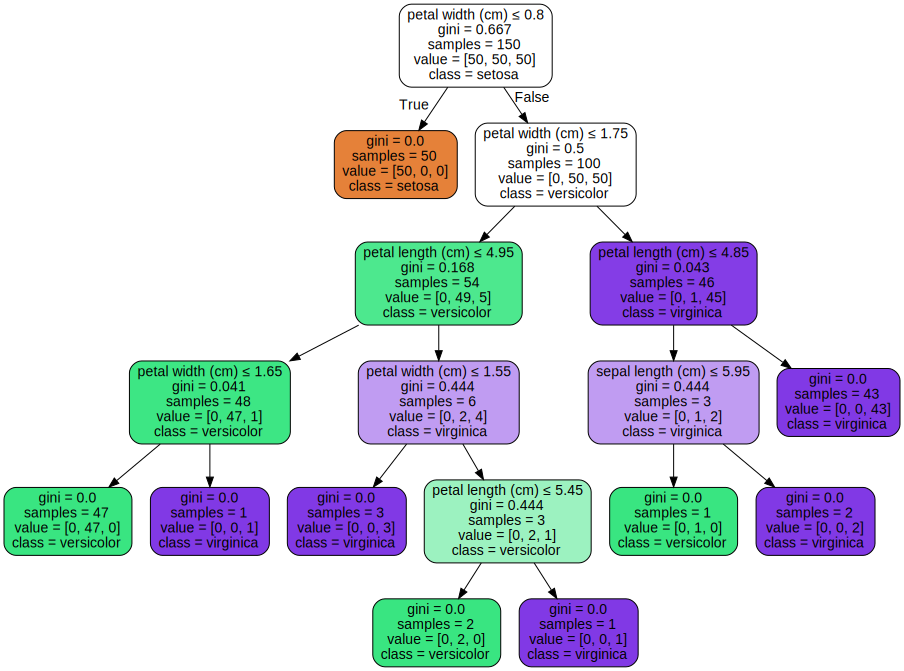

In [101]:
iris = load_iris()

x = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier()
model = tree_clf.fit(x,y)

dot_data = export_graphviz(tree_clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

graph